In [1]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import matplotlib
matplotlib.__version__

'3.7.2'

In [4]:
import seaborn
seaborn.__version__

'0.12.2'

In [5]:
import scipy
scipy.__version__

'1.10.0'

In [6]:
csv_files = glob.glob('Data/Relative_yield/*.csv')
df = pd.concat((pd.read_csv(file) for file in csv_files))
df['PlotID'] = df['PlotID'].astype(str)
print(df.shape)
df.head()

(3735, 16)


,Unnamed: 0,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls,Optional controls,Treatment,Average Control Yield,Relative Yield
0,2558,-96.892102,31.483818,31.541,11.5,2018,3,16A,167.557648,0.204031,179.969315,"['1', '4', '5']",5.0,Low,35.14032,-10.242708
1,2559,-96.892133,31.483804,36.110,11.5,2018,3,16A,167.515076,1.461173,217.709656,"['1', '4', '5']",5.0,Low,35.14032,2.759450
2,2560,-96.892163,31.483789,34.140,11.5,2018,3,16A,167.511383,1.517218,76.031807,"['1', '4', '5']",5.0,Low,35.14032,-2.846645
3,2561,-96.892190,31.483776,41.226,11.5,2018,3,16A,167.481903,0.236201,206.576904,"['1', '4', '5']",5.0,Low,35.14032,17.318225
4,2562,-96.892218,31.483763,41.130,11.5,2018,3,16A,167.459198,0.269463,130.031677,"['1', '4', '5']",5.0,Low,35.14032,17.045034


In [7]:
df.dtypes

Unnamed: 0                 int64
Longitude                float64
Latitude                 float64
Yield                    float64
Moisture                 float64
Year                       int64
PlotID                    object
FieldID                   object
elevation                float64
slope                    float64
aspect                   float64
Controls                  object
Optional controls        float64
Treatment                 object
Average Control Yield    float64
Relative Yield           float64
dtype: object

In [8]:
# Define the treatment values
treatments = {
    "16A": {
        "Low": {"plots": ['3', '10', '18'], "value": 11.3},
        "Medium": {"plots": ['7', '14', '15'], "value": 22.5},
        "High": {"plots": ['6', '11', '19'], "value": 33.8}
    },
    "6-12": {
        "Low": {"plots": ['6', '10', '20'], "value": 16.9},
        "Medium": {"plots": ['4', '14', '18'], "value": 22.5},
        "High": {"plots": ['8', '12', '16'], "value": 28.2}
    },
    "Y10": {
        "Low": {"plots": ['5', '13', '21'], "value": 5.6},
        "Medium": {"plots": ['3', '9', '15'], "value": 11.3},
        "High": {"plots": ['7', '15', '19'], "value": 16.9}
    },
    "Y8": {
        "Low": {"plots": ['5', '7', '21', '23'], "value": 3.4},
        "Medium": {"plots": ['10', '12', '18', '20'], "value": 6.8},
        "High": {"plots": ['13', '15', '26', '28'], "value": 10.1}
    },
    "SW16": {
        "Low": {"plots": ['3', '11', '13'], "value": 9},
        "Medium": {"plots": ['1', '9', '15'], "value": 18},
        "High": {"plots": ['5', '7', '17'], "value": 27}
    }
}

# Create a function to map treatment values to plot IDs based on FieldID
def map_treatment(row):
    field_id = row['FieldID']
    plot_id = row['PlotID']
    
    if field_id in treatments:
        field_treatments = treatments[field_id]
        for treatment, values in field_treatments.items():
            if plot_id in values['plots']:
                
                return values['value']

    return None

# Assuming your DataFrame is called 'df'
df["PhosphorusTreatment"] = df.apply(map_treatment, axis=1)
# Fill NaN values with zero in 'PhosphorusTreatment' column
df = df[df['PhosphorusTreatment'] > 0]
average_df = df[['PlotID','FieldID','Year','Treatment','PhosphorusTreatment','Relative Yield']].groupby(['PlotID','FieldID','Year','Treatment','PhosphorusTreatment']).mean().reset_index()
average_df.to_csv('Output/Data/average_relative_yield_by_year_fieldID_PlotID.csv')
print(average_df.shape)
average_df.head()

(186, 6)


,PlotID,FieldID,Year,Treatment,PhosphorusTreatment,Relative Yield
0,1,SW16,2018,Medium,18.0,4.021368
1,1,SW16,2019,Medium,18.0,-17.229058
2,1,SW16,2020,Medium,18.0,39.379351
3,1,SW16,2022,Medium,18.0,15.223613
4,10,16A,2018,Low,11.3,16.107875


In [9]:
#averages df.shape = (150, 14)

In [10]:
df.groupby(['FieldID', 'PlotID']).count().mean()

Unnamed: 0               79.468085
Longitude                79.468085
Latitude                 79.468085
Yield                    79.468085
Moisture                 79.468085
Year                     79.468085
elevation                79.468085
slope                    79.468085
aspect                   79.468085
Controls                 60.021277
Optional controls        24.595745
Treatment                79.468085
Average Control Yield    79.468085
Relative Yield           79.468085
PhosphorusTreatment      79.468085
dtype: float64

In [11]:
from scipy.stats import shapiro

# Select 'Relative Yield' data for a particular 'FieldID'
for fieldID in set(df['FieldID']):
    for year in set(df['Year']):
        field_yield = df[(df['FieldID'] == fieldID) & (df['Year'] == year)]['Relative Yield']

        # Perform Shapiro-Wilk test
        stat, p = shapiro(field_yield)

        # Print results
        if p > 0.05:
            print('Data is likely normally distributed.')
        else:
            print('Data is likely not normally distributed.')

Data is likely not normally distributed.
Data is likely normally distributed.
Data is likely not normally distributed.
Data is likely not normally distributed.
Data is likely not normally distributed.
Data is likely not normally distributed.
Data is likely normally distributed.
Data is likely not normally distributed.
Data is likely normally distributed.
Data is likely normally distributed.
Data is likely normally distributed.
Data is likely not normally distributed.
Data is likely not normally distributed.
Data is likely not normally distributed.
Data is likely normally distributed.
Data is likely normally distributed.
Data is likely not normally distributed.
Data is likely normally distributed.
Data is likely not normally distributed.
Data is likely normally distributed.


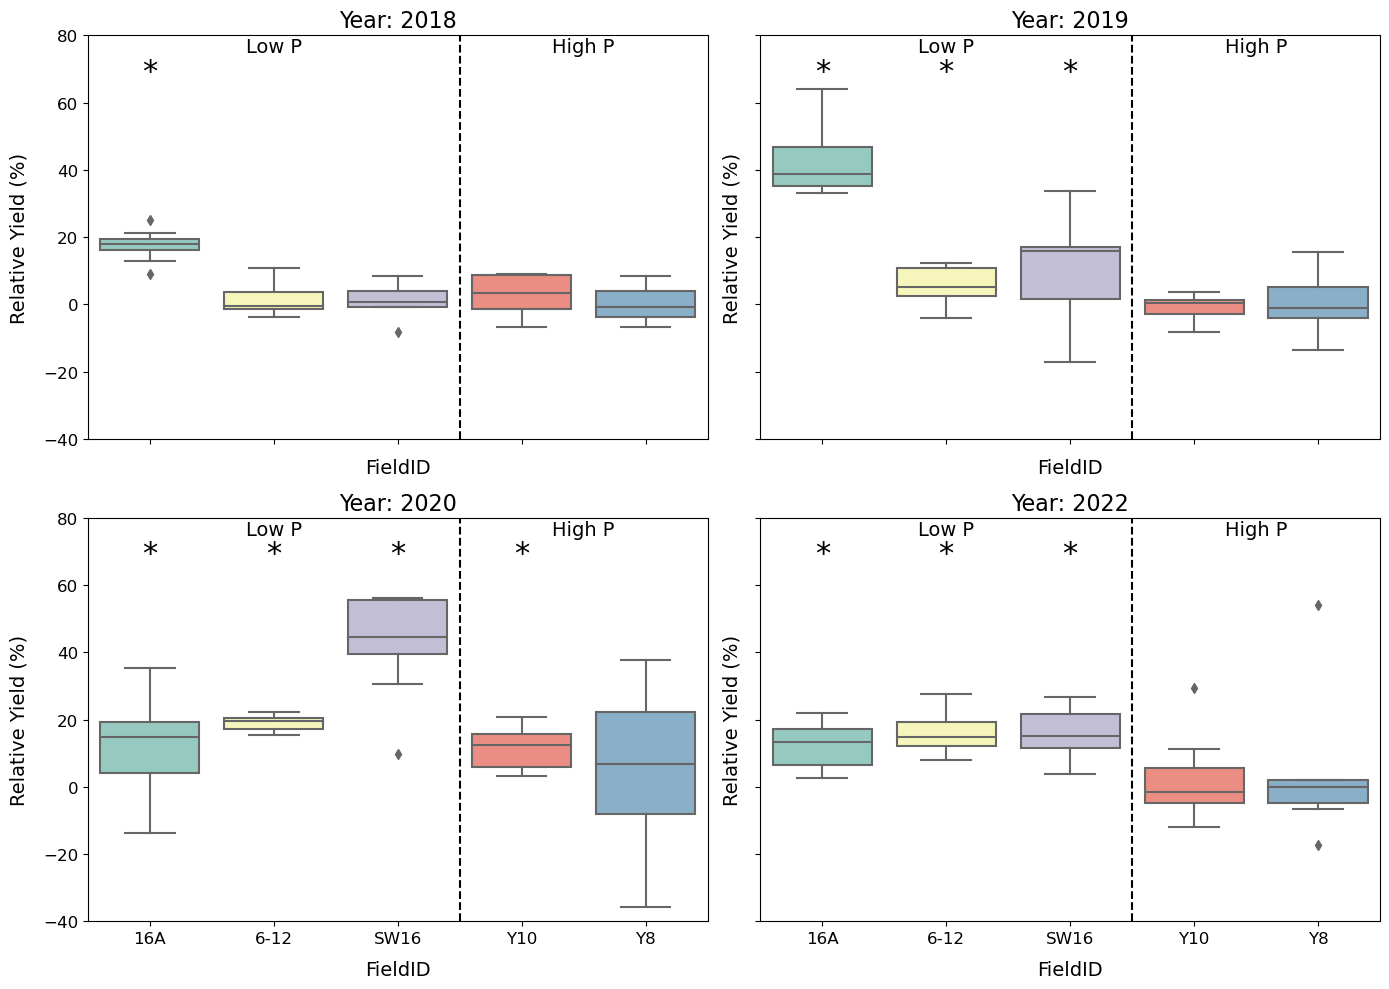

In [12]:
# get a list of unique years
years = df['Year'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10), sharex=True, sharey=True)

# reshape axes for easy iteration
axes = axes.reshape(-1)

# for star annotation
def star(p):
    if p <= 0.05:
        return "*"
    else:
        return ""

for i, year in enumerate(years):
    # select data for the specific year
    temp_df = df[df['Year'] == year]
    temp_df = temp_df[['PlotID','FieldID','Treatment','Relative Yield']].groupby(['PlotID','FieldID','Treatment']).mean().reset_index()
    
    # order the unique FieldIDs alphabetically (as seaborn does by default)
    field_ids = sorted(temp_df['FieldID'].unique())
    
    # create a boxplot
    boxplot = sns.boxplot(ax=axes[i], x='FieldID', y='Relative Yield', 
                data=temp_df, palette='Set3', order = field_ids)

    # iterate over boxes
    for j, field_id in enumerate(field_ids):
        field_yield = temp_df[temp_df['FieldID'] == field_id]['Relative Yield']
        # run Mann-Whitney U test against zero
        u, p = mannwhitneyu(field_yield, np.zeros(len(field_yield)))
        # if p < 0.05 then place a star over the box
        if p < 0.05:
            axes[i].text(j, 65, star(p), ha='center', fontsize=22, va='bottom')  # Increase the fontsize for bigger asterisks and decrease the y position offset for closer placement

    # set title for the subplot
    axes[i].set_title(f'Year: {year}', fontsize=16)
    axes[i].set_xlabel('FieldID', labelpad=10, fontsize=14)
    axes[i].set_ylabel('Relative Yield (%)', labelpad=10, fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    
    # add vertical line between the 2nd and 3rd boxplots
    axes[i].axvline(2.5, color='k', linestyle='--')
    
    # add labels above the boxplots
    axes[i].text(1, 75, "Low P", ha='center', fontsize=14)
    axes[i].text(3.5, 75, "High P", ha='center', fontsize=14)
    axes[i].set_ylim(-40,80)
    
    # Set tick labels
    # axes[i].set_xticklabels(range(1, len(field_ids) + 1))

plt.tight_layout()
plt.savefig('Output/Figures/combined_relative_yield_averages.jpg', bbox_inches = 'tight', dpi = 300)

In [13]:
df.head()

,Unnamed: 0,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls,Optional controls,Treatment,Average Control Yield,Relative Yield,PhosphorusTreatment
0,2558,-96.892102,31.483818,31.541,11.5,2018,3,16A,167.557648,0.204031,179.969315,"['1', '4', '5']",5.0,Low,35.14032,-10.242708,11.3
1,2559,-96.892133,31.483804,36.110,11.5,2018,3,16A,167.515076,1.461173,217.709656,"['1', '4', '5']",5.0,Low,35.14032,2.759450,11.3
2,2560,-96.892163,31.483789,34.140,11.5,2018,3,16A,167.511383,1.517218,76.031807,"['1', '4', '5']",5.0,Low,35.14032,-2.846645,11.3
3,2561,-96.892190,31.483776,41.226,11.5,2018,3,16A,167.481903,0.236201,206.576904,"['1', '4', '5']",5.0,Low,35.14032,17.318225,11.3
4,2562,-96.892218,31.483763,41.130,11.5,2018,3,16A,167.459198,0.269463,130.031677,"['1', '4', '5']",5.0,Low,35.14032,17.045034,11.3


In [14]:
# Grouping by 'FieldID' and 'Year', and extracting the first 'Average Control Yield' for each group
grouped = df.groupby(['FieldID', 'Year'])['Average Control Yield'].first().reset_index()

# Constructing the new DataFrame
new_rows = pd.DataFrame({
    'FieldID': grouped['FieldID'],
    'Year': grouped['Year'],
    'Yield': grouped['Average Control Yield'],
    'Treatment': 'Control',  # Set the Treatment column to 'Control'
    'PhosphorusTreatment': 0  # Set the PhosphorusTreatment column to 0
})

# Append the new rows to the original df
df_extended = pd.concat([df, new_rows], ignore_index=True, sort=False)

# Sorting for clarity (optional)
df_extended = df_extended.sort_values(by=['FieldID', 'Year']).reset_index(drop=True)

In [15]:
# Step 1: Convert the 'Yield' from bu/ac to kg/ha.
df_extended['y'] = df_extended['Yield'] * 25.4016  # bu/ac to kg/ha

# Constants
COST_OF_FERTILIZER = 1153/1000 # $/ton / kg/ton = $/kg

# Step 2: Calculate the cost for each phosphorus application
df_extended['cost_dollars_ha'] = df_extended['PhosphorusTreatment'] * 1.12085 * COST_OF_FERTILIZER  # lbs/ac * (kg/ha)/(lbs/ac) * $/kg = $/ha

# Step 3: Compute the yield per dollar
def compute_yield_per_dollar(row):
    if row['cost_dollars_ha'] == 0:
        return 0
    return row['y'] / row['cost_dollars_ha']  # kg/ha / $/ha = kg/$

df_extended['yield_kg_per_dollar'] = df_extended.apply(compute_yield_per_dollar, axis=1)

# Step 4: Compute the revenue in dollars per hectare based on the given yield
df_extended['dollars_per_ha'] = df_extended['y'] * 0.20  # kg/ha * $/kg = $/ha

# Step 5: Calculate the net revenue (revenue minus cost)
def compute_dollar_per_acre(row):
    if row['y'] == 0:
        return row['dollars_per_ha']
    return row['dollars_per_ha'] - row['cost_dollars_ha']  # $/ha - $/ha

df_extended['dollars_per_ha_minus_cost'] = df_extended.apply(compute_dollar_per_acre, axis=1)

In [16]:
from scipy.stats import linregress

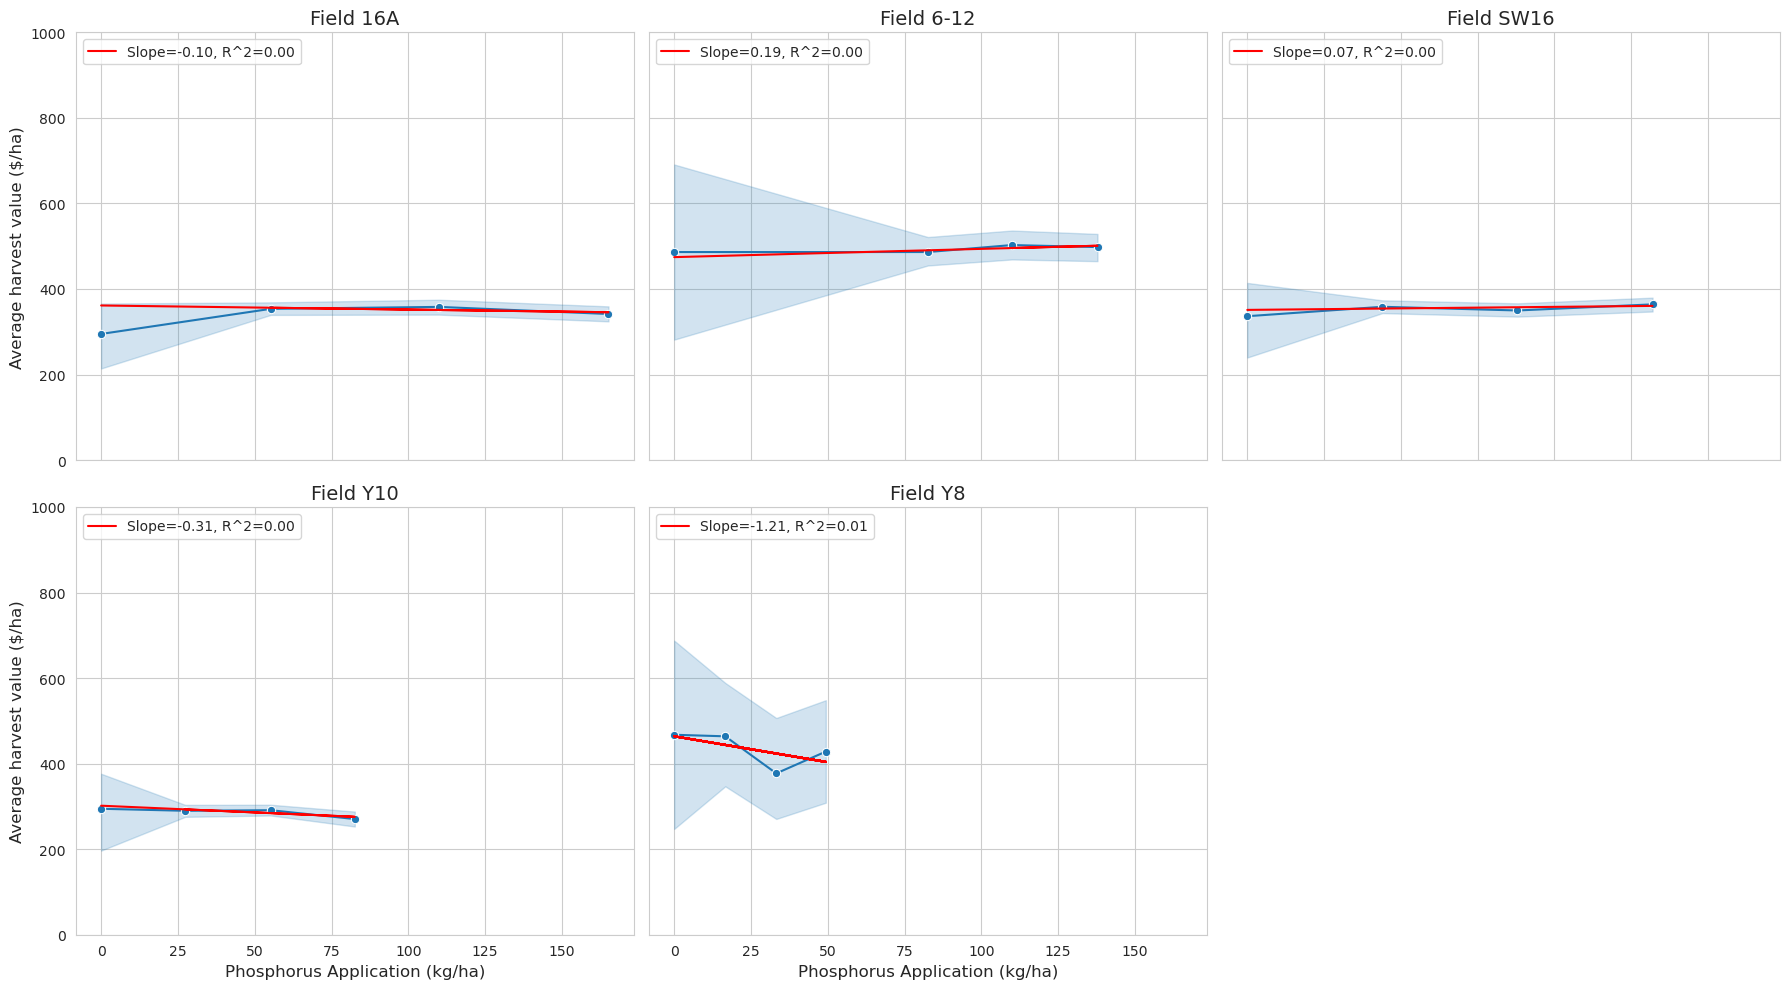

In [19]:
# Converting to kg/ha
df_extended['PhosphorusTreatment_metric'] = df_extended['PhosphorusTreatment']*0.45359/0.0404686

# Set the style of Seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure and axes for the subplots in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True, sharex = True)

# Flatten the axes array for easier iteration
axes_flat = axes.flatten()

# Iterate over each unique field
fields = df_extended['FieldID'].unique()

for index, field in enumerate(fields):
    # Filter the dataframe for the current field
    field_df = df_extended[df_extended['FieldID'] == field]
    field_df.loc[:,'PhosphorusTreatment_metric'] = field_df.loc[:,'PhosphorusTreatment_metric'] * 0.436 # Converting to P from P2O5
    
    # Plotting the line plot for the current field
    sns.lineplot(x='PhosphorusTreatment_metric', y='dollars_per_ha_minus_cost', data=field_df, ax=axes_flat[index], marker='o')
    
    # Compute regression statistics
    # field_df_no_control = field_df[field_df['Treatment'] != 'Control']
    slope, intercept, r_value, p_value, std_err = linregress(field_df['PhosphorusTreatment_metric'], field_df['dollars_per_ha_minus_cost'])
    axes_flat[index].plot(field_df['PhosphorusTreatment_metric'], intercept + slope*field_df['PhosphorusTreatment_metric'], 'r', label=f'Slope={slope:.2f}, R^2={r_value**2:.2f}')
    
    # Set title for each subplot
    axes_flat[index].set_title(f'Field {field}', fontsize=14)
    
    # Display the legend for the current field's subplot
    axes_flat[index].legend(loc='upper left')
    
    # Set x and y labels for the first subplot only
    if index == 0 or index == 3:
        axes_flat[index].set_ylabel('Average harvest value ($/ha)', fontsize=12)
    else:
        axes_flat[index].set_ylabel('')
    
    axes_flat[index].set_xlabel('Phosphorus Application (kg/ha)', fontsize=12)
    axes_flat[index].set_ylim(0, 1000)

# Remove the plot from the last subplot (making it empty)
axes_flat[-1].axis('off')

plt.tight_layout()
# plt.suptitle('Average Yield Per Dollar vs. Phosphorus Application Levels', fontsize=16, y=1.05)
plt.show()